In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.optimize import curve_fit

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
flux_df =  pd.read_csv('/kaggle/input/plotling/NGC_1275_MJD_57000_59823.csv')
flux_df.head()

,MJD,FLUX
0,57002.500778,4.020363e-07
1,57007.500778,3.663023e-07
2,57012.500778,4.248154e-07
3,57017.500778,3.707932e-07
4,57022.500778,5.609029e-07


put those files in a drive in a seperate folder and then use following command to import those files from here
```python
from google.colab import drive
drive.mount("/content/drive")
```

In [3]:
time_df = pd.read_csv('/kaggle/input/plotling/time_series_data.txt', delimiter='\t')
time_df.head()

,time,data
0,0.00000,1.790256
1,0.10101,2.140671
2,0.20202,2.367048
3,0.30303,2.367189
4,0.40404,2.357972


In [4]:
data1 = np.genfromtxt('/kaggle/input/plottings2/time_series_data.txt', comments='!')
data1

array([[ 0.        ,  1.79025576],
       [ 0.1010101 ,  2.14067144],
       [ 0.2020202 ,  2.36704775],
       [ 0.3030303 ,  2.36718889],
       [ 0.4040404 ,  2.35797209],
       [ 0.50505051,  2.30779271],
       [ 0.60606061,  2.55043594],
       [ 0.70707071,  2.33109498],
       [ 0.80808081,  2.2396027 ],
       [ 0.90909091,  2.77810471],
       [ 1.01010101,  2.61257461],
       [ 1.11111111,  2.44755898],
       [ 1.21212121,  2.79894846],
       [ 1.31313131,  2.75340149],
       [ 1.41414141,  2.69422846],
       [ 1.51515152,  2.66484201],
       [ 1.61616162,  3.04683838],
       [ 1.71717172,  3.02459265],
       [ 1.81818182,  2.76730887],
       [ 1.91919192,  2.73378095],
       [ 2.02020202,  2.58386539],
       [ 2.12121212,  3.2497103 ],
       [ 2.22222222,  2.90786288],
       [ 2.32323232,  2.92730912],
       [ 2.42424242,  3.105867  ],
       [ 2.52525253,  3.19589054],
       [ 2.62626263,  3.46652204],
       [ 2.72727273,  3.53520178],
       [ 2.82828283,

In [5]:
t1 = data1[:,0]
F1 = data1[0:,1]
err1 = np.sqrt(data1[:,1])

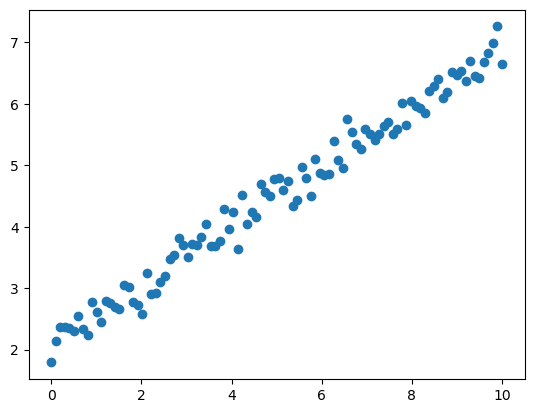

In [6]:
plt.plot(t1, F1, "o");

In [7]:
def straight_line(x,m,c):
    return m*x+c

In [8]:
params, cov = curve_fit(straight_line, t1, F1)
print(params[0], params[1])

0.4817343799201349 2.0916374657233465


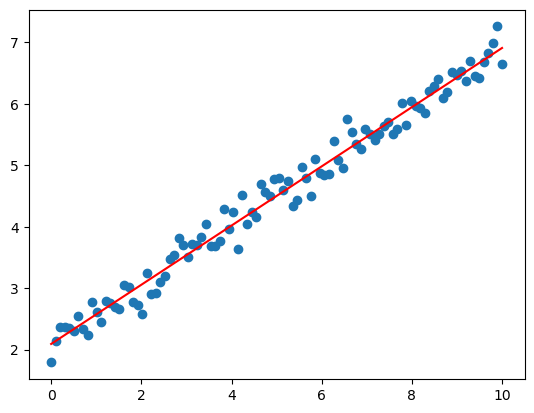

In [9]:
F2 = straight_line(t1, params[0], params[1])
plt.plot(t1, F2, 'r')
plt.scatter(t1, F1);

In [10]:
np.sum((F2-F1/err1)**2)

693.1146828993947

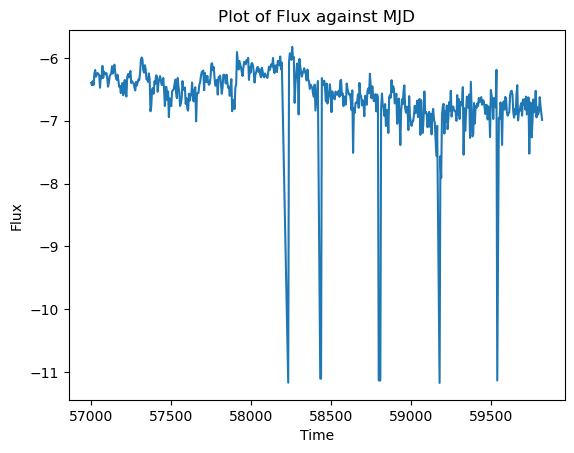

In [11]:
#Taking logs and lineplot
plt.plot(flux_df['MJD'], np.log10(flux_df['FLUX']))
plt.title("Plot of Flux against MJD")
plt.xlabel('Time')
plt.ylabel('Flux');

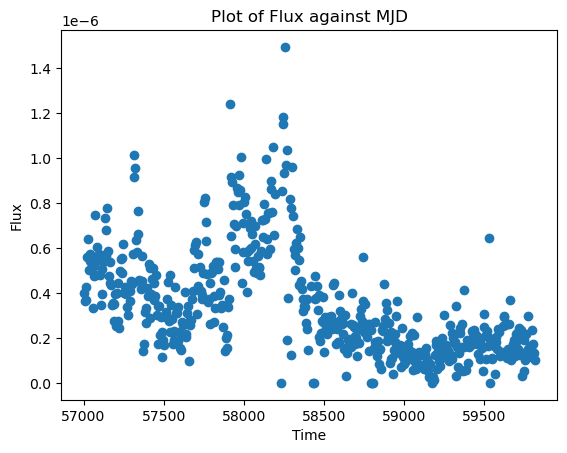

In [12]:
plt.scatter(flux_df['MJD'], flux_df['FLUX'])
plt.title("Plot of Flux against MJD")
plt.xlabel('Time')
plt.ylabel('Flux');

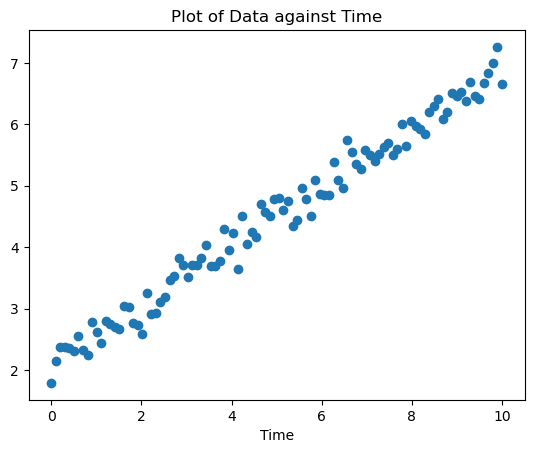

In [13]:
plt.scatter(time_df['time'], time_df['data'])
plt.title("Plot of Data against Time")
plt.xlabel("Time");

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(time_df[['time']], time_df['data'])
print(model.intercept_, model.coef_)

2.0916374632136345 [0.48173438]


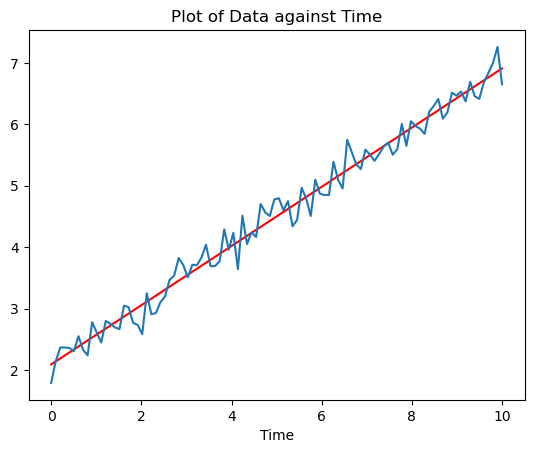

In [16]:
y1 = model.predict(time_df[['time']])
plt.plot(time_df[['time']],y1, color='r')
plt.plot(time_df['time'], time_df['data'])
plt.title("Plot of Data against Time")
plt.xlabel("Time");

In [18]:
# num_data = np.genfromtxt('/kaggle/input/plottings/time_series_data.txt')
# num_data[:,0]
# num_data[:,1]

In [19]:
def line(x,m,c):
    return m * x + c

In [20]:
params, cov = curve_fit(line,flux_df['MJD'], flux_df['FLUX'])
print(params)

[-1.54561731e-10  9.37046829e-06]


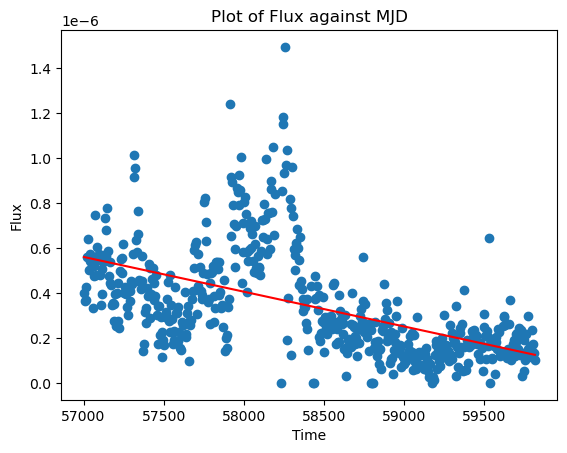

In [21]:
fit_flux = line(flux_df['MJD'],params[0], params[1])
plt.scatter(flux_df['MJD'], flux_df['FLUX'])
plt.plot(flux_df['MJD'], fit_flux, color='r')
plt.title("Plot of Flux against MJD")
plt.xlabel('Time')
plt.ylabel('Flux');

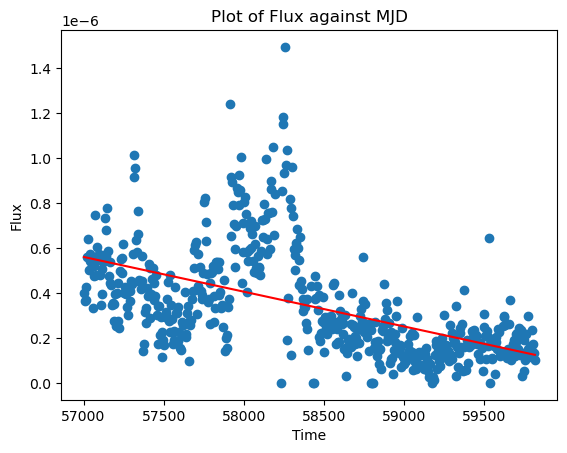

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(flux_df[['MJD']],flux_df['FLUX'])
predict_flux = model.predict(flux_df[['MJD']])
plt.scatter(flux_df['MJD'], flux_df['FLUX'])
plt.plot(flux_df['MJD'], predict_flux, color='r')
plt.title("Plot of Flux against MJD")
plt.xlabel('Time')
plt.ylabel('Flux');

# Lecture 8

In [37]:
covid = pd.read_csv('/kaggle/input/prac8data/covid.csv')
covid.head()

,DATE,Daily_Confirmed
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1


In [38]:
len(covid)

115

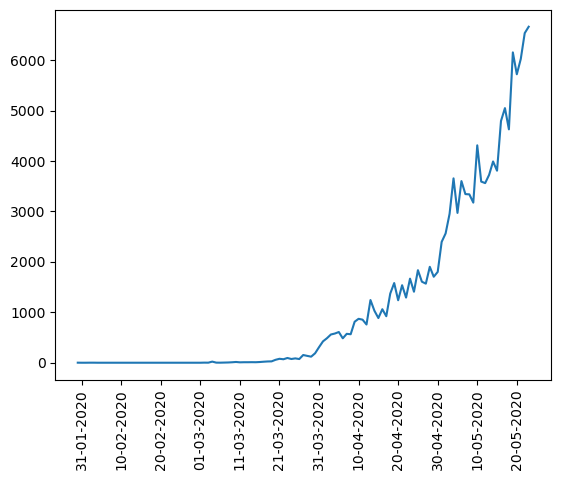

In [39]:
x = covid['DATE']
y = covid['Daily_Confirmed']
plt.plot(x,y)
plt.xticks([covid['DATE'][i] for i in range(1,116,10)], rotation=90);

In [40]:
covid['indexes']=covid.index
covid.head()

,DATE,Daily_Confirmed,indexes
0,30-01-2020,1,0
1,31-01-2020,0,1
2,01-02-2020,0,2
3,02-02-2020,1,3
4,03-02-2020,1,4


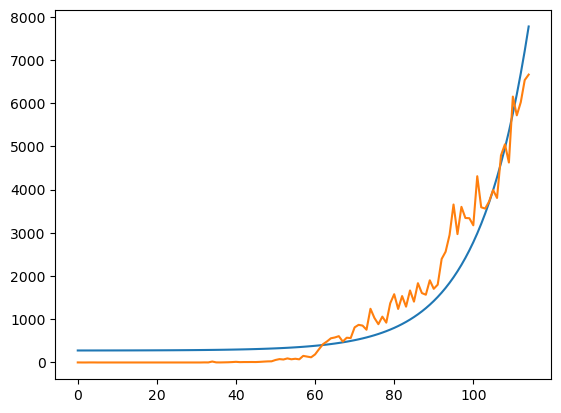

In [41]:
def exponential(x, m, c):
    return np.exp(m*x)+c
popt, covt = curve_fit( exponential, covid['indexes'], covid['Daily_Confirmed'])
predicted_cases =  exponential(covid['indexes'], popt[0], popt[1])
plt.plot(covid['indexes'],predicted_cases)
plt.plot(covid['indexes'], covid['Daily_Confirmed'])
plt.show()

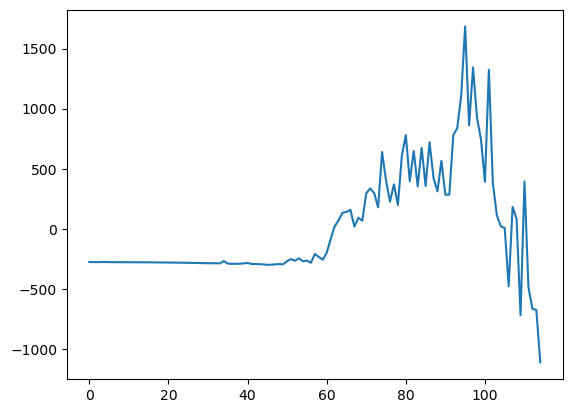

In [42]:
residue = covid['Daily_Confirmed'] - predicted_cases
covid['Residue'] = residue
plt.plot(covid['indexes'], residue)
plt.show();

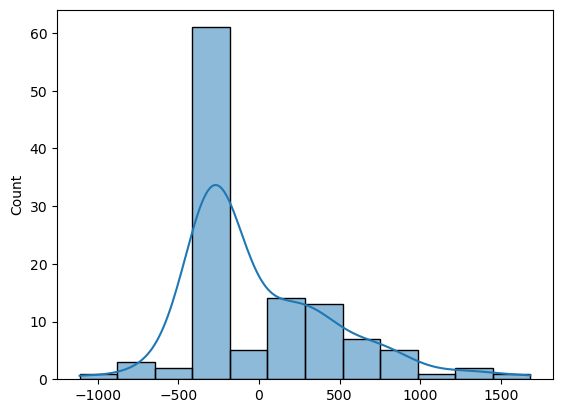

In [50]:
import seaborn as sns
sns.histplot(residue, kde=True);

### fitting gaussian to the residue

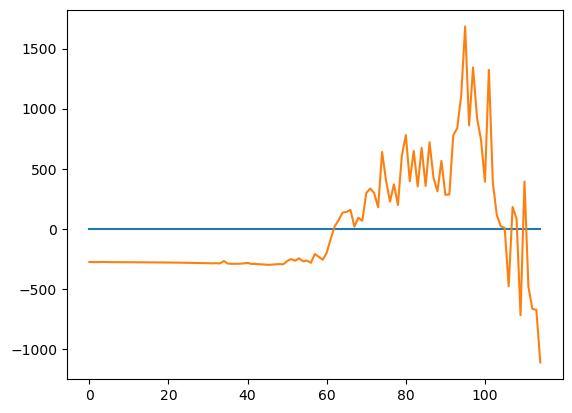

In [46]:
def gaussian(x,mu,sigma, c):
    return np.exp(-((x-mu)/sigma)**2)
popt, covt = curve_fit( gaussian, covid['indexes'], residue)
predicted_residue =  gaussian(covid['indexes'], popt[0], popt[1])
plt.plot(covid['indexes'],predicted_residue)
plt.plot(covid['indexes'], residue)
plt.show()

### Exponeital with Sine nature

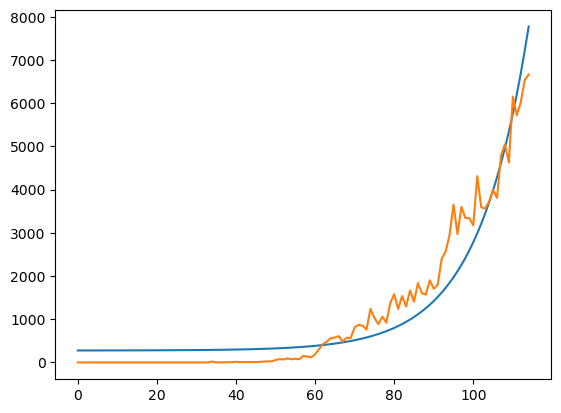

In [61]:
def exponential_sine(x, m, c):
    return np.exp(m*x)+np.sin(*x)+c
popt, covt = curve_fit(exponential_sine, covid['indexes'], covid['Daily_Confirmed'])
predicted_cases =  exponential_sine(covid['indexes'], popt[0], popt[1])
plt.plot(covid['indexes'],predicted_cases)
plt.plot(covid['indexes'], covid['Daily_Confirmed'])
plt.show()

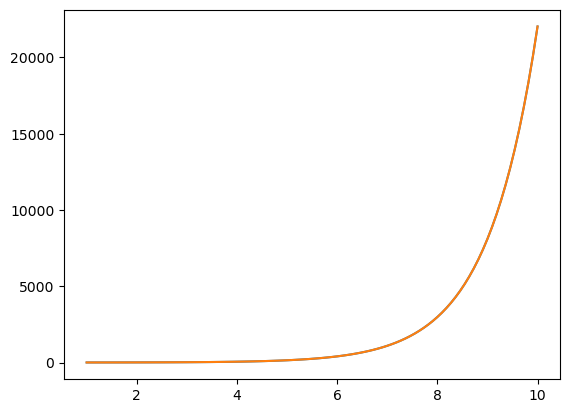

In [63]:
x = np.linspace(1,10,100)
y = exponential_sine(x,1,1)
y1 = exponential(x, 1, 1)
plt.plot(x,y)
plt.plot(x,y1)

In [64]:
df = pd.read_csv('/kaggle/input/prac8data/mjd_flux.csv')
df

,MJD,FLUX
0,54687.650035,2.936060e-07
1,54697.650035,2.990764e-07
2,54707.650035,3.131870e-07
3,54717.650035,2.844194e-07
4,54727.650035,2.098870e-07
...,...,...
346,58147.650035,6.513562e-07
347,58157.650035,7.966162e-07
348,58167.650035,9.106239e-07
349,58177.650035,9.167619e-07
